データの確認

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
train = pd.read_csv('liver_origin.csv')
# test = pd.read_csv('output_test.csv')

# データサイズの確認
print(f'Train shape: {train.shape}')# Test shape: {test.shape}')

# 先頭行の出力
train.head()
# test.head()

Train shape: (583, 11)


,age,gender,Total_Bilirubin,DBDirect_Bilirubin,Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,\tTotal_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,label
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,liver_patient
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,liver_patient
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,liver_patient
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,liver_patient
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,liver_patient


統計量の確認

In [2]:
train.describe(include='all')
# test.describe(include='all')

,age,gender,Total_Bilirubin,DBDirect_Bilirubin,Alkaline_Phosphotase,Sgpt_Alamine_Aminotransferase,Sgot_Aspartate_Aminotransferase,\tTotal_Protiens,ALB_Albumin,A/G_Ratio_Albumin_and_Globulin_Ratio,label
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,liver_patient
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,NaN
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,NaN
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


相関関係の確認

/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/.pyenv/versions/3.10.5/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


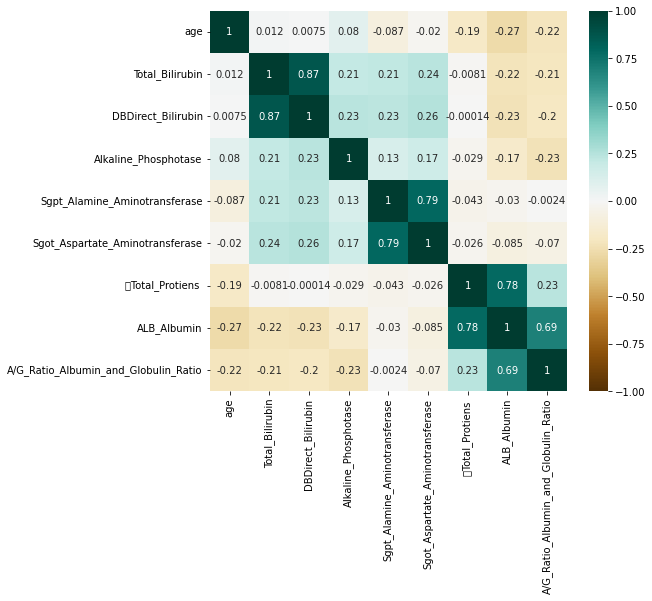

In [3]:
#変数間の相関関係のヒートマップ
fig = plt.figure(figsize=(8,7))
ax = sns.heatmap(train.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1)

#カテゴリ変数とラベルの関係
# categorical_feature = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
# for feature_name in categorical_feature:
#     fig = plt.figure(figsize=(30,5))
#     plt.xticks(rotation=45, ha="right")
#     ax = sns.countplot(x=feature_name, hue='>50K, <=50K.', data=train)
plt.show()

欠損値とクラスの関係（欠損値がある場合はP.94参照）

In [4]:
print(f'Null of Train: {(train.isnull().sum())}')
# print(f'Null of Test: {(test.isnull().sum())}')

Null of Train: age                                     0
gender                                  0
Total_Bilirubin                         0
DBDirect_Bilirubin                      0
Alkaline_Phosphotase                    0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
\tTotal_Protiens                        0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    4
label                                   0
dtype: int64


前処理

In [5]:
from sklearn.preprocessing import OrdinalEncoder

# # カテゴリカル変数の定義
categorical_feature = ['gender']

# # 特徴量エンジニアリング
train = train.dropna(subset=['A/G_Ratio_Albumin_and_Globulin_Ratio']) #欠損値があるカラムがあれば指定
# test = test.dropna(subset=['workclass', 'occupation', 'native-country']) #欠損値があるカラムがあれば指定

# df = pd.concat([train, test])
df = train
oe = OrdinalEncoder()
df[categorical_feature] = oe.fit_transform(df[categorical_feature]).astype(int)

# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K': 0, ' >50K': 1})
# df['>50K, <=50K.'] = df['>50K, <=50K.'].replace({' <=50K.': 0, ' >50K.': 1})

# データの正規化
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df = df.rename(columns={'label': 'target'})

df['target'] = pd.factorize(df['target'])[0]
df_target = df['target']
df_without_target = df.drop(columns=['target'])

# Fit and transform the data without the target column
from sklearn import preprocessing
# df_without_target_scaled = pd.DataFrame(scaler.fit_transform(df_without_target), columns = df_without_target.columns)
df_without_target_scaled = pd.DataFrame(preprocessing.scale(df_without_target), columns=df_without_target.columns)

# Combine the target column and the scaled data
df_scaled = pd.concat([df_without_target_scaled, df_target], axis=1)

df_scaled.to_csv('liver.csv', index=False)
# train = df[df['Survived'].notnull()]#ラベルに欠損値がある場合
# test = df[df['Survived'].notnull()].drop(columns=['Survived'])#ラベルに欠損値がある場合

In [ ]:
train.describe(include='all')